<a href="https://colab.research.google.com/github/lucaCosca/JetNet_ML-Final-Project/blob/main/Control_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Base Neural Network

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf


### Obtaining the Dataset


In [3]:
pip install jetnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 865.1/865.1 kB 53.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.7/636.7 kB 48.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.7/192.7 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 700.8/700.8 kB 48.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 466.2/466.2 kB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.9/84.9 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.3/362.3 kB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.3/182.3 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
from jetnet.datasets import JetNet
from jetnet.utils import to_image

/usr/local/lib/python3.10/dist-packages/coffea/nanoevents/schemas/fcc.py:5: FutureWarning: In version 2025.1.0 (target date: 2024-12-31 11:59:59-06:00), this will be an error.
To raise these warnings as errors (and get stack traces to find out where they're called), run
    import warnings
    warnings.filterwarnings("error", module="coffea.*")
after the first `import coffea` or use `@pytest.mark.filterwarnings("error:::coffea.*")` in pytest.
Issue: coffea.nanoevents.methods.vector will be removed and replaced with scikit-hep vector. Nanoevents schemas internal to coffea will be migrated. Otherwise please consider using that package!.
  from coffea.nanoevents.methods import vector


In [5]:
data_args = {
    "jet_type": ["g", "q", "t", "w", "z"],
    # ‘g’ (gluon), ‘q’ (light quarks), ‘t’ (top quarks), ‘w’ (W bosons), or ‘z’ (Z bosons)
    "data_dir": "datasets/jetnet",
    # only selecting the kinematic features
    "particle_features": ["etarel", "phirel", "ptrel"], #correlated to x,y
    "num_particles": 30,
    "jet_features": ["type"],
    "download": True,
}

# download as numpy arrays
particle_data, jet_data = JetNet.getData(**data_args)

[██████████████████████████████████████████████████] 100%
[██████████████████████████████████████████████████] 100%
[██████████████████████████████████████████████████] 100%
[██████████████████████████████████████████████████] 100%
[██████████████████████████████████████████████████] 100%


In [6]:
''' EXPORT TO IMAGES '''
num_images = 70000
im_size = 50
#l = 50, poi se aggiungi 25 di padding a dx e sx ottieni l'immaggine 100x100 che ci da delle rose nel suo dataset
aaa = [to_image(particle_data[i], im_size, maxR=0.4) for i in range(num_images)]
X_Data = np.array(aaa)
np.savez("X_N" + str(num_images) + "_lpx" + str(im_size) + "_gqtwz", np.array(aaa))
np.savez("Y_N" + str(num_images) + "_lpx" + str(im_size) + "_gqtwz", jet_data[:num_images])

([<matplotlib.axis.XTick at 0x7c6011ffe740>,
 [Text(0, 0, 'g'),
  Text(1, 0, 'q'),
  Text(2, 0, 't'),
  Text(3, 0, 'w'),
  Text(4, 0, 'z')])

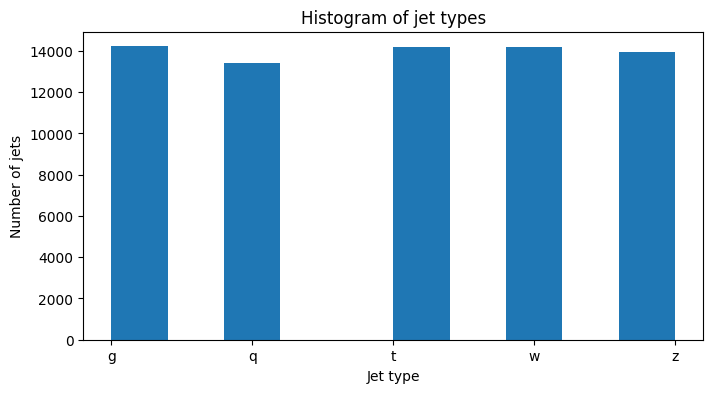

In [7]:
Y_Data = jet_data[:num_images]

plt.subplots(figsize=(8,4))
plt.hist(Y_Data[:70000,0])
plt.title("Histogram of jet types")
plt.xlabel("Jet type")
plt.ylabel("Number of jets")
plt.xticks(range(len(data_args["jet_type"])), data_args["jet_type"])

## Data Preprocessing

g  [1. , 0. ,0. ,0. , 0.] \\
q  [0. , 1. ,0. ,0. , 0.] \\
t  [0. , 0. ,1. ,0. , 0.] \\
w  [0. , 0. ,0. ,1. , 0.] \\
z  [0. , 0. ,0. ,0. , 1.] \\

In [8]:
# data split
train_end = int(0.6 * num_images)
test_end = train_end + int(0.2 * num_images)

X_train, X_test, X_val = X_Data[:train_end], X_Data[train_end:test_end], X_Data[test_end:]
Y_train, Y_test, Y_val = Y_Data[:train_end], Y_Data[train_end:test_end], Y_Data[test_end:]

from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse_output=False)
Y_train_onehot = one_hot_encoder.fit_transform(Y_train.reshape((-1,1)))
Y_valid_onehot = one_hot_encoder.fit_transform(Y_val.reshape((-1,1)))
Y_test_onehot = one_hot_encoder.fit_transform(Y_test.reshape((-1,1)))


## Neural Network Model

In [14]:
model0 = tf.keras.Sequential([
    tf.keras.layers.Input(shape = [50,50]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax'),
])

In [15]:
model0.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 2500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 500)                 │       1,250,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 200)                 │         100,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 200)                 │          40,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 5)                   │           1,005 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,391,905 (5.31 MB)

 Trainable params: 1,391,905 (5.31 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model0.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics = ['accuracy'],
)

history = model0.fit(
    X_train, Y_train_onehot,
    batch_size = 32,
    epochs = 10,
    validation_data = (X_val, Y_valid_onehot)
)

Epoch 1/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.4693 - loss: 1.2540 - val_accuracy: 0.5681 - val_loss: 1.0722
Epoch 2/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6183 - loss: 0.9962 - val_accuracy: 0.6181 - val_loss: 1.0001
Epoch 3/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6614 - loss: 0.9169 - val_accuracy: 0.6426 - val_loss: 0.9619
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6860 - loss: 0.8521 - val_accuracy: 0.6541 - val_loss: 0.9439
Epoch 5/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7131 - loss: 0.7877 - val_accuracy: 0.6474 - val_loss: 0.9586
Epoch 6/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7332 - loss: 0.7378 - val_accuracy: 0.6516 - val_loss: 0.9771
Epoch 7/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7596 - loss: 0.6654 - val_accuracy: 0.6320 - val_loss: 1.0873
Epoch 8/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7821 - loss: 0.6096 - 

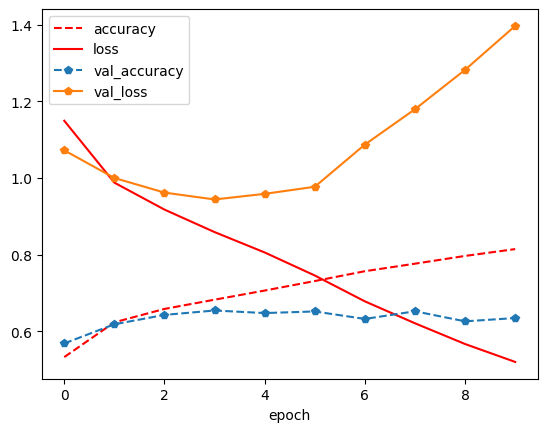

In [17]:
h = pd.DataFrame(history.history)
h.plot(xlabel = "epoch", style = ["r--","r-","p--","p-"])
plt.show()